In [45]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math as m

print("Imported necessary libraries")

Imported necessary libraries


## Data for FY2022-2023

In [46]:
start_date = dt.date(2018,4,1)
end_date = dt.date(2023,4,1)
start_date, end_date

(datetime.date(2018, 4, 1), datetime.date(2023, 4, 1))

In [47]:
# Get data from yfinance

# Nifty weekly

# df = yf.download(tickers="^NSEI", interval="1wk", start=start_date, end=end_date)
# df.to_csv("nifty_weekly_fy_18_23.csv")

# Indiavix daily - NOT working
# df = yf.download(tickers="^INDIAVIX", interval="1wk", start=start_date, end=end_date)
# df.to_csv("indiavix_daily_fy_18_23.csv")

# Got Indiavix data from investing.com
# dfv = pd.read_html("file:///home/ganesh/Downloads/vix_weekly.html")[0]
# dfv["Date"] = pd.to_datetime(dfv["Date"], format="%b %d, %Y")
# dfv.sort_values(by="Date", inplace=True)
# dfv.to_csv("indiavix_weekly_fy_18_23.csv")

In [48]:
# Get nifty data stored in a local file
nifty = pd.read_excel("/home/ganesh/Github/markets/quant trading/volatility/nifty_weekly_fy_18_23.xlsx")
nifty

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-02,10151.650391,10350.450195,10111.299805,10331.599609,10331.599609,1098800
1,2018-04-09,10333.700195,10519.900391,10328.500000,10480.599609,10480.599609,1175400
2,2018-04-16,10398.299805,10594.200195,10396.349609,10564.049805,10564.049805,1113700
3,2018-04-23,10592.799805,10719.799805,10514.950195,10692.299805,10692.299805,937700
4,2018-04-30,10705.750000,10784.650391,10601.599609,10618.250000,10618.250000,775200
...,...,...,...,...,...,...,...
256,2023-02-27,17428.599609,17644.750000,17255.199219,17594.349609,17594.349609,1607100
257,2023-03-06,17680.349609,17799.949219,17324.349609,17412.900391,17412.900391,1128100
258,2023-03-13,17421.900391,17529.900391,16850.150391,17100.050781,17100.050781,1551600
259,2023-03-20,17066.599609,17207.250000,16828.349609,16945.050781,16945.050781,935700


In [49]:
type(nifty["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
# Get indiavix data stored in a local file
vix = pd.read_excel("/home/ganesh/Github/markets/quant trading/volatility/indiavix_weekly_fy_18_23.xlsx")
vix["Date"] = pd.to_datetime(vix["Date"], format="%b %d, %Y")
vix.sort_values(by="Date", inplace=True)
vix = vix.iloc[1:, :]
vix

,Date,Price,Open,High,Low,Volume,Chg%
1,2018-04-08,14.1400,14.7475,15.1375,11.8075,0,-4.12%
2,2018-04-15,12.9375,14.1400,14.8625,9.7425,0,-8.50%
3,2018-04-22,12.0175,12.9375,13.5800,11.4375,0,-7.11%
4,2018-04-29,13.2500,12.0175,13.4550,10.9875,0,10.26%
5,2018-05-06,13.9775,13.2500,14.8200,11.0925,0,5.49%
...,...,...,...,...,...,...,...
256,2023-02-26,12.1800,14.1850,15.0975,11.1000,0,-14.13%
257,2023-03-05,13.4125,12.1800,13.8175,11.7800,0,10.12%
258,2023-03-12,14.7675,13.4125,17.3550,13.4125,0,10.10%
259,2023-03-19,15.2400,14.7675,17.2200,13.9025,0,3.20%


In [51]:
vix.shape

(260, 7)

In [52]:
data = nifty.copy()
data["points_move"] = data["Close"].diff().round()
data["abs_points_move"] = abs(data["points_move"])
data["returns"] = data["Close"].pct_change()

idx = data.shape[1]
data.insert(idx, "indiavix", vix["Open"])
idx = data.shape[1]
data.insert(idx, "vix_chg", vix["Chg%"])

data["indiavix"] = data["indiavix"].shift(periods=-1)
data["vix_chg"] = data["vix_chg"].shift(periods=-1)


data["vix_change"] = data["indiavix"].pct_change()
data

,Date,Open,High,Low,Close,Adj Close,Volume,points_move,abs_points_move,returns,indiavix,vix_chg,vix_change
0,2018-04-02,10151.650391,10350.450195,10111.299805,10331.599609,10331.599609,1098800,NaN,NaN,NaN,14.7475,-4.12%,NaN
1,2018-04-09,10333.700195,10519.900391,10328.500000,10480.599609,10480.599609,1175400,149.0,149.0,0.014422,14.1400,-8.50%,-0.041193
2,2018-04-16,10398.299805,10594.200195,10396.349609,10564.049805,10564.049805,1113700,83.0,83.0,0.007962,12.9375,-7.11%,-0.085042
3,2018-04-23,10592.799805,10719.799805,10514.950195,10692.299805,10692.299805,937700,128.0,128.0,0.012140,12.0175,10.26%,-0.071111
4,2018-04-30,10705.750000,10784.650391,10601.599609,10618.250000,10618.250000,775200,-74.0,74.0,-0.006926,13.2500,5.49%,0.102559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2023-02-27,17428.599609,17644.750000,17255.199219,17594.349609,17594.349609,1607100,129.0,129.0,0.007360,12.1800,10.12%,-0.141346
257,2023-03-06,17680.349609,17799.949219,17324.349609,17412.900391,17412.900391,1128100,-181.0,181.0,-0.010313,13.4125,10.10%,0.101190
258,2023-03-13,17421.900391,17529.900391,16850.150391,17100.050781,17100.050781,1551600,-313.0,313.0,-0.017967,14.7675,3.20%,0.101025
259,2023-03-20,17066.599609,17207.250000,16828.349609,16945.050781,16945.050781,935700,-155.0,155.0,-0.009064,15.2400,-15.12%,0.031996


## IV based predictions  

In [65]:
def iv_based_predictions(spot_price, atm_iv, days_to_expiry=5, risk_stddev=1.25):
    exp_move_pct = (atm_iv/(np.sqrt(256/days_to_expiry)))
    exp_move_pct_for_desired_risk = exp_move_pct * risk_stddev
    # return exp_move_pct, exp_move_pct_for_desired_risk
    points_move = (spot_price * (exp_move_pct_for_desired_risk/100)).round(0)
    lower_strike = (spot_price - points_move).round(0)
    upper_strike = (spot_price + points_move).round(0)
    return exp_move_pct_for_desired_risk, points_move, lower_strike, upper_strike

In [66]:
dff = data.copy()
# dff[["a", "b", "c", "d"]] = dff[["Close", "indiavix"]].map(iv_based_predictions)

dff[["exp_move_pct", "exp_points_move", "lower", "upper"]] = dff.apply(lambda x: iv_based_predictions(x.Close, x.indiavix), axis=1, result_type="expand").shift(periods=1)
dff

,Date,Open,High,Low,Close,Adj Close,Volume,points_move,abs_points_move,returns,indiavix,vix_chg,vix_change,exp_move_pct,exp_points_move,lower,upper
0,2018-04-02,10151.650391,10350.450195,10111.299805,10331.599609,10331.599609,1098800,NaN,NaN,NaN,14.7475,-4.12%,NaN,NaN,NaN,NaN,NaN
1,2018-04-09,10333.700195,10519.900391,10328.500000,10480.599609,10480.599609,1175400,149.0,149.0,0.014422,14.1400,-8.50%,-0.041193,2.576282,266.0,10066.0,10598.0
2,2018-04-16,10398.299805,10594.200195,10396.349609,10564.049805,10564.049805,1113700,83.0,83.0,0.007962,12.9375,-7.11%,-0.085042,2.470156,259.0,10222.0,10740.0
3,2018-04-23,10592.799805,10719.799805,10514.950195,10692.299805,10692.299805,937700,128.0,128.0,0.012140,12.0175,10.26%,-0.071111,2.260088,239.0,10325.0,10803.0
4,2018-04-30,10705.750000,10784.650391,10601.599609,10618.250000,10618.250000,775200,-74.0,74.0,-0.006926,13.2500,5.49%,0.102559,2.099371,224.0,10468.0,10916.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2023-02-27,17428.599609,17644.750000,17255.199219,17594.349609,17594.349609,1607100,129.0,129.0,0.007360,12.1800,10.12%,-0.141346,2.478018,433.0,17033.0,17899.0
257,2023-03-06,17680.349609,17799.949219,17324.349609,17412.900391,17412.900391,1128100,-181.0,181.0,-0.010313,13.4125,10.10%,0.101190,2.127758,374.0,17220.0,17968.0
258,2023-03-13,17421.900391,17529.900391,16850.150391,17100.050781,17100.050781,1551600,-313.0,313.0,-0.017967,14.7675,3.20%,0.101025,2.343067,408.0,17005.0,17821.0
259,2023-03-20,17066.599609,17207.250000,16828.349609,16945.050781,16945.050781,935700,-155.0,155.0,-0.009064,15.2400,-15.12%,0.031996,2.579776,441.0,16659.0,17541.0


<AxesSubplot:>

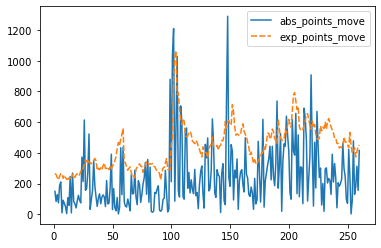

In [67]:
sns.lineplot(data=dff[["Date", "abs_points_move", "exp_points_move"]])

In [68]:
dff["overshoot"] = dff.apply(lambda x: (x["abs_points_move"] > x["exp_points_move"]), axis=1)
dff

,Date,Open,High,Low,Close,Adj Close,Volume,points_move,abs_points_move,returns,indiavix,vix_chg,vix_change,exp_move_pct,exp_points_move,lower,upper,overshoot
0,2018-04-02,10151.650391,10350.450195,10111.299805,10331.599609,10331.599609,1098800,NaN,NaN,NaN,14.7475,-4.12%,NaN,NaN,NaN,NaN,NaN,False
1,2018-04-09,10333.700195,10519.900391,10328.500000,10480.599609,10480.599609,1175400,149.0,149.0,0.014422,14.1400,-8.50%,-0.041193,2.576282,266.0,10066.0,10598.0,False
2,2018-04-16,10398.299805,10594.200195,10396.349609,10564.049805,10564.049805,1113700,83.0,83.0,0.007962,12.9375,-7.11%,-0.085042,2.470156,259.0,10222.0,10740.0,False
3,2018-04-23,10592.799805,10719.799805,10514.950195,10692.299805,10692.299805,937700,128.0,128.0,0.012140,12.0175,10.26%,-0.071111,2.260088,239.0,10325.0,10803.0,False
4,2018-04-30,10705.750000,10784.650391,10601.599609,10618.250000,10618.250000,775200,-74.0,74.0,-0.006926,13.2500,5.49%,0.102559,2.099371,224.0,10468.0,10916.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2023-02-27,17428.599609,17644.750000,17255.199219,17594.349609,17594.349609,1607100,129.0,129.0,0.007360,12.1800,10.12%,-0.141346,2.478018,433.0,17033.0,17899.0,False
257,2023-03-06,17680.349609,17799.949219,17324.349609,17412.900391,17412.900391,1128100,-181.0,181.0,-0.010313,13.4125,10.10%,0.101190,2.127758,374.0,17220.0,17968.0,False
258,2023-03-13,17421.900391,17529.900391,16850.150391,17100.050781,17100.050781,1551600,-313.0,313.0,-0.017967,14.7675,3.20%,0.101025,2.343067,408.0,17005.0,17821.0,False
259,2023-03-20,17066.599609,17207.250000,16828.349609,16945.050781,16945.050781,935700,-155.0,155.0,-0.009064,15.2400,-15.12%,0.031996,2.579776,441.0,16659.0,17541.0,False


In [69]:
dff["overshoot"].value_counts()

False    227
True      34
Name: overshoot, dtype: int64

In [70]:
dff["overshoot"].value_counts()

False    227
True      34
Name: overshoot, dtype: int64

In [71]:
overshoot_pct = dff["overshoot"].value_counts()[True] / dff.shape[0]
overshoot_pct.round(2)

0.13